# Project Group - 33

Members: Amber van der Helm, Femke Tamsma, Merel Loman, Naomi Rottier, and Robin Karthaus

Student numbers: 5164303, 5122422, 4852982, 5496462, 5634563

# 1 Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

The bin packing is an operational research (OR) technique. It is similar to the knapsack problem, however the knapsack problem is a maximization problem where the purpose is to fill a fixed-size knapsack with the most valuable items. Whereas, in the bin packing problem all items should be assigned and the purpose is to minimize the number of used bins (Dowsland & Dowsland, 1992). Throughout the supply chain various applications can be found where a bin packing problem is encountered. From assigning cargo to airplanes or containers to assigning packages to trucks. The latter is what will be the objective of this project. 

The objective for this research is to design a model that is able to optimize the allocation of packages to vehicles, using various bin packing algorithms. The goal of this project is to design an optimal algorithm which is obtained by continuously increasing the complexity of the algorithm. With complexity it is meant that the model will be using more and more data in the model instead of making many assumptions. Using more of the data is done by adding extra variables, for example, the dimensions of the packages instead of using the volume or not selecting a package from all packages but first sorting them on their destination locations. These complexity steps one the one hand (slightly) increase computation time because more variables are taken into account but on the other hand also drastically decrease the computation time since the algorithm is run on smaller datasets because restrictions are given to which packages are selected, defined by their destination locations. Taken together, the computation time will decrease when adding more complexity to the mode. Initially there are four algorithms which each are a more complex version of the previous, namely; next-fit, next-k-fit, first-fit and best-fit. These algorithms allocate the packages to the vehicles. Later, the allocation is the other way around where vehicles are allocated to optimal combinations of packages in order to minimize the total volume left in each vehicle. 

The data set from the "Amazon Last Mile Routing Challenge Dataset" is used. This data contains information about the dimension of the packages being delivered. The data is first imported to Python and converted from a JSON file to a CSV file. There has been checked for missing values, which initially would either be deleted or replaced by the average values. However, no missing values were found in the dataset. To simplify the model, the three dimensions (length, width, height), are converted to a new variable (column) "volume" in cm3. Since the dimension of the vans is also in cm3, optimizing the bin packing algorithm will be possible. After these first data processing steps, the data is further cleaned by checking for outliers and deleting these if necessary. Since the greatest “outlier” was still a very reasonable volume size for a package, no outliers have been deleted from the dataset. Also a general view of the data has been formed by descriptive statistics and corresponding visualizations (box plots, normal distributions, histograms, scatter plots, etc.). 

After the data is cleaned and a general view of the data is formed the different algorithms are written. Like said before, the model is written in different steps, with various algorithms. First many assumptions will be made to keep the algorithm as simple as possible (for example, only one van at a time can be loaded). When the model runs correctly, the algorithm will be made more complex by adding more constraints, making less assumptions and therefore adding more variables. Each "complexity step" in the model will be monitored separately and give insight into the capacity of the model of optimizing the loading more optimally. A visualization regarding the decrease in total needed vans per increase in model complexity will be created. Other visuals will be created to visualize for example the different package zones per destination city and box plots and histograms regarding the distribution of the data.

The research question for this assignment is: "How to optimize the allocation of packages to vehicles using various bin packing algorithms?”. 

***Specific -*** This question will focus on how packages can most optimally be allocated to vehicles regarding data provided by Amazon. The purpose is to find out what the most optimal allocation is and which algorithm gives this optimal allocation. 

***Measurable -*** Outcomes of the dataset analysis will focus on (1) the different bin packing algorithms, (2) the differences between the algorithms (regarding assumptions, variables and computation time), (3) the different stations (destination location zones) and (4) the different vehicles sizes.

***Achievable/Assignable -*** The dataset provided by Amazon is used for data on volume (deprived from dimensions), vehicles dimensions and destination locations for packages. With this data is it possible to develop an algorithm that allocates the packages as optimal as possible (minimizing the amount of leftover space per vehicle). 

***Relevant/Realistic -***  Because of climate change, much thought is being given to reducing emissions. This can be achieved when vans are used more effectively, reducing the need to drive.

***Time-bound -*** The dataset is based on the period 19 july 2018 and 26 august 2018. If the developed algorithm works correctly over this time period, it can also be extended for other (longer and future) time periods. This project is written in a time span of 6 weeks.

The associated sub-questions are:

***Subquestion 1:*** “Which model complexity steps have been taken into account and how does the model (and output) change according to this increase in complexity?”

***Subquestion 2:*** “How to visualize the different complexity steps using advanced and interactive visualization?”

***Subquestion 3:*** “How does the computation time vary, regarding the different algorithms?” 


# 2 Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1** (Amber): importing data as a dataframe

**Author 2** (Femke): visualization possibilities 

**Author 3** (Merel): importing data as a dataframe

**Author 4** (Naomi): checking other projects and RQs

**Author 5** (Robin): visualization possibilities

# 3  Data Import

We have used two datasets from Amazon to get the dimensions of the packages and delivery vans. The first dataset "package_data.json" gives us information about the dimensions of the packages, which will be used to compute the volume for each package. The second dataset "route_data.json" will be used to obtain the volume capacity of the delivery vehicles. More documentation can be found here: https://github.com/MIT-CAVE/rc-cli/blob/main/templates/data_structures.md. 

First, the necessary libraries will be imported and these two datasets will be opened before creating the dataframe.

In [26]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

json_file_path_package = 'package_data.json'

with open(json_file_path_package, 'r') as file:
    data_package = json.load(file)

json_file_path_route = 'route_data.json'

with open(json_file_path_route, 'r') as file:
    data_route = json.load(file)

After loading our datasets, it is stored in a way that we can use it for our research question. First, the json data of the packages will be put in a dataframe.

In [27]:
# Initialize empty lists for each column
package_ids = []
scan_statuses = []
start_times = []
end_times = []
service_times = []
depths = []
heights = []
widths = []
stop_ids = []
route_ids = []

# Iterate through the JSON data to extract information
for route_id, route_data in data_package.items():
    for stop_id, stop_data in route_data.items():
        for package_id, package_data in stop_data.items():
            package_ids.append(package_id)
            scan_statuses.append(package_data.get("scan_status", ""))
            time_window = package_data.get("time_window", {})
            start_times.append(time_window.get("start_time_utc", ""))
            end_times.append(time_window.get("end_time_utc", ""))
            service_times.append(package_data.get("planned_service_time_seconds", ""))
            dimensions = package_data.get("dimensions", {})
            depths.append(dimensions.get("depth_cm", ""))
            heights.append(dimensions.get("height_cm", ""))
            widths.append(dimensions.get("width_cm", ""))
            stop_ids.append(stop_id)
            route_ids.append(route_id)

# Create a pandas DataFrame from the extracted data
df_package = pd.DataFrame({
    "PackageID": package_ids,
    "ScanStatus": scan_statuses,
    "StartTimeUTC": start_times,
    "EndTimeUTC": end_times,
    "PlannedServiceTimeSeconds": service_times,
    "DepthCM": depths,
    "HeightCM": heights,
    "WidthCM": widths,
    "StopID": stop_ids,
    "RouteID": route_ids
})

# Display the resulting DataFrame
df_package.head(5)


,PackageID,ScanStatus,StartTimeUTC,EndTimeUTC,PlannedServiceTimeSeconds,DepthCM,HeightCM,WidthCM,StopID,RouteID
0,PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09ea,DELIVERED,NaN,NaN,59.3,25.4,7.6,17.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
1,PackageID_5541e679-b7bd-4992-b288-e862f6c84ae7,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,59.3,25.4,12.7,17.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
2,PackageID_84d0295b-1adb-4a33-a65e-f7d6247c7a07,DELIVERED,NaN,NaN,59.3,39.4,7.6,31.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
3,PackageID_15c6a204-ec5f-4ced-9c3d-472316cc7759,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,27.0,30.0,3.0,27.4,AF,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
4,PackageID_3b28f781-242e-416e-9575-84c7188b8208,DELIVERED,NaN,NaN,45.0,25.4,12.7,17.8,AG,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77


Now that the data of the packages is loaded into a dataframe, the second json file will be converted to a dataframe in order to get useful route data.  

In [28]:
# Initialize empty lists for each column
route_ids = []
station_codes = []
dates = []
departure_times = []
executor_capacities = []
route_scores = []
stop_ids = []
lats = []
lngs = []
types = []
zone_ids = []

# Iterate through the JSON data to extract information
for route_id, route_data in data_route.items():
    station_code = route_data.get("station_code", "")
    date = route_data.get("date_YYYY_MM_DD", "")
    departure_time_utc = route_data.get("departure_time_utc", "")
    executor_capacity_cm3 = route_data.get("executor_capacity_cm3", "")
    route_score = route_data.get("route_score", "")
    
    stops = route_data.get("stops", {})
    for stop_id, stop_data in stops.items():
        lat = stop_data.get("lat", "")
        lng = stop_data.get("lng", "")
        stop_type = stop_data.get("type", "")
        zone_id = stop_data.get("zone_id", "")
        
        route_ids.append(route_id)
        station_codes.append(station_code)
        dates.append(date)
        departure_times.append(departure_time_utc)
        executor_capacities.append(executor_capacity_cm3)
        route_scores.append(route_score)
        stop_ids.append(stop_id)
        lats.append(lat)
        lngs.append(lng)
        types.append(stop_type)
        zone_ids.append(zone_id)

# Create a pandas DataFrame from the extracted data
df_route = pd.DataFrame({
    "RouteID": route_ids,
    "station_code": station_codes,
    "date_YYYY_MM_DD": dates,
    "departure_time_utc": departure_times,
    "executor_capacity_cm3": executor_capacities,
    "route_score": route_scores,
    "stop_id": stop_ids,
    "lat": lats,
    "lng": lngs,
    "type": types,
    "zone_id": zone_ids
})

# Display the resulting DataFrame
df_route.head(5)

,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stop_id,lat,lng,type,zone_id
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AD,34.099611,-118.283062,Dropoff,P-12.3C
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AF,34.101587,-118.291125,Dropoff,A-1.2D
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AG,34.089727,-118.285530,Dropoff,A-2.1A
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,BA,34.096132,-118.292869,Dropoff,A-1.2C
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,BE,34.098482,-118.286243,Dropoff,P-13.3B


# 4  Data Pipeline

### 4.1 Data Cleaning

Before implementing our algorithms, the raw data must be cleaned. For the first dataset "package_data" the dimensions must have a value in order to compute the volume. Therefore, we have to check if NaN values exist for these data fields and if so, replace the NaN value with the mean of the data field. This is also necessary for the volume capacity of the delivery vehicles in the second dataset "route_data". As one can see in the code below, there are no missing values for each data field. 

In [29]:
#Check if there are any missing values in the specified columns
columns_to_check_package = ['DepthCM', 'WidthCM', 'HeightCM']
columns_to_check_route = ['executor_capacity_cm3']

missing_values_package = df_package[columns_to_check_package].isna().any().any()
missing_values_route = df_route[columns_to_check_route].isna().any().any()

if not missing_values_package and not missing_values_route:
    print("No missing values in the specified columns.")
else:
    print("There are missing values in the specified columns.")

No missing values in the specified columns.


### 4.2 Data Distribution

Now that the data is cleaned, the data distribution can be displayed. To get the general overview of the df_package dataset, the describe function is used to generate some basic information.

In [30]:
df = df_package
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,PlannedServiceTimeSeconds,DepthCM,HeightCM,WidthCM
count,1457175.00,1457175.00,1457175.00,1457175.00
mean,68.24,34.09,10.20,24.79
std,66.92,9.22,7.35,7.24
min,0.70,0.80,0.00,0.20
25%,36.50,26.20,4.80,17.80
50%,53.00,32.70,7.60,24.30
75%,78.00,39.40,12.70,29.20
max,8007.00,132.10,83.80,101.60


To display the data distribution, the distribution of the volume of the packages is presented in a histogram. As one can see, there are some outliers present. However, these outliers have realistic values and thus will not be excluded from the dataset. 

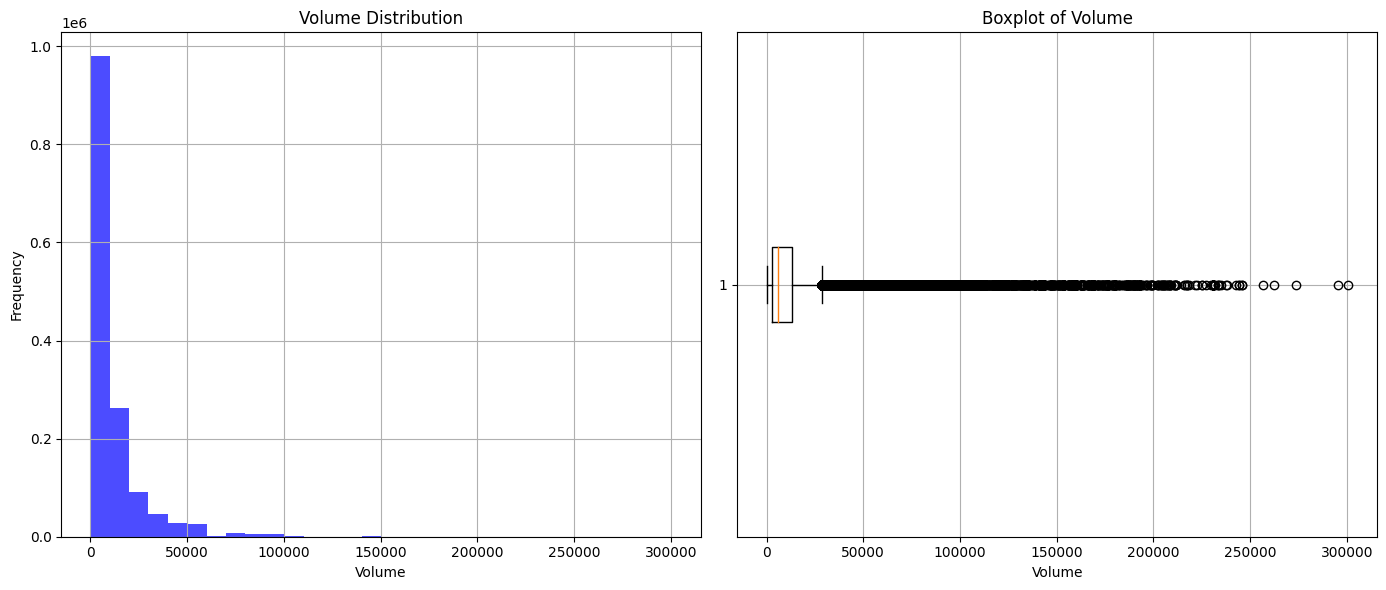

In [31]:
# Add a column named package_volume by multiplying DepthCM, HeightCM and WidthCM
df_package['package_volume'] = (df_package['DepthCM'] * df_package['HeightCM'] * df_package['WidthCM'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram on the first subplot (ax1)
ax1.hist(df_package['package_volume'], bins=30, color='blue', alpha=0.7)
ax1.set_title('Volume Distribution')
ax1.set_xlabel('Volume')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Plot the boxplot on the second subplot (ax2)
ax2.boxplot(df_package['package_volume'], vert=False)
ax2.set_title('Boxplot of Volume')
ax2.set_xlabel('Volume')
ax2.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

To get a more in depth overview of the dimensions of the packages, the average values of the depth, height and width will be calculated below. 

In [32]:
# Calculate the average values of the DepthCM, HeightCM en WidthCM
average_depth = df_package['DepthCM'].mean()
average_height = df_package['HeightCM'].mean()
average_width = df_package['WidthCM'].mean()

# Print the average values
print(f"Average Depth (DepthCM): {average_depth}")
print(f"Average Height (HeightCM): {average_height}")
print(f"Average Width (WidthCM): {average_width}")

Average Depth (DepthCM): 34.085609662531965
Average Height (HeightCM): 10.204020786796374
Average Width (WidthCM): 24.793701374234395


Later in the study, we are going to subdivide the cities under the different station codes. For this, we need to know how many and which station codes there are. This is easy to look up with the df.unique() code.

In [33]:
df = df_route
unique_station_codes = df['station_code'].unique() 
print("the unique values of the station codes are:")
print(', '.join(unique_station_codes))

the unique values of the station codes are:
DLA3, DSE4, DSE5, DLA9, DLA7, DCH4, DBO2, DBO3, DLA8, DLA5, DCH3, DCH1, DAU1, DCH2, DLA4, DSE2, DBO1


In order to get a general idea of how the depth, height and width of all the packages are distributed around their corresponding average values, several boxplots have been created. 

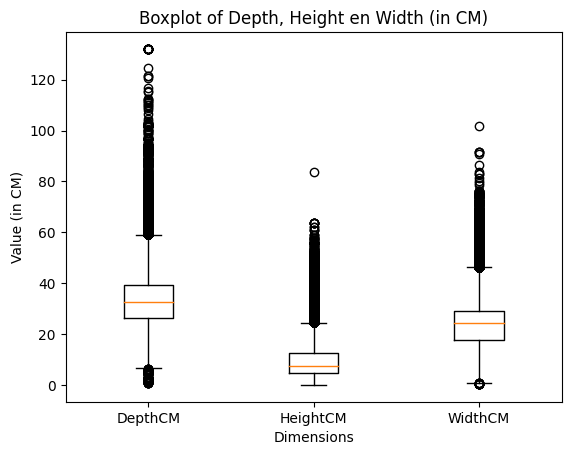

In [34]:
import matplotlib.pyplot as plt

# List the data for the boxplot
data_to_plot = [df_package['DepthCM'], df_package['HeightCM'], df_package['WidthCM']]

# Create a figure and a set of plots
fig, ax = plt.subplots()

# Make the boxplot
ax.boxplot(data_to_plot, labels=['DepthCM', 'HeightCM', 'WidthCM'])
ax.set_xlabel('Dimensions')
ax.set_ylabel('Value (in CM)')
plt.title('Boxplot of Depth, Height en Width (in CM)')

plt.show()

The boxplots reveal the existence of some outliers, which can have different causes. For instance, the outliers could mean that there is a lot of variability in package sizes, that there are many large packages or that there are many packages delivered that are exceptions from the rest of the packets.


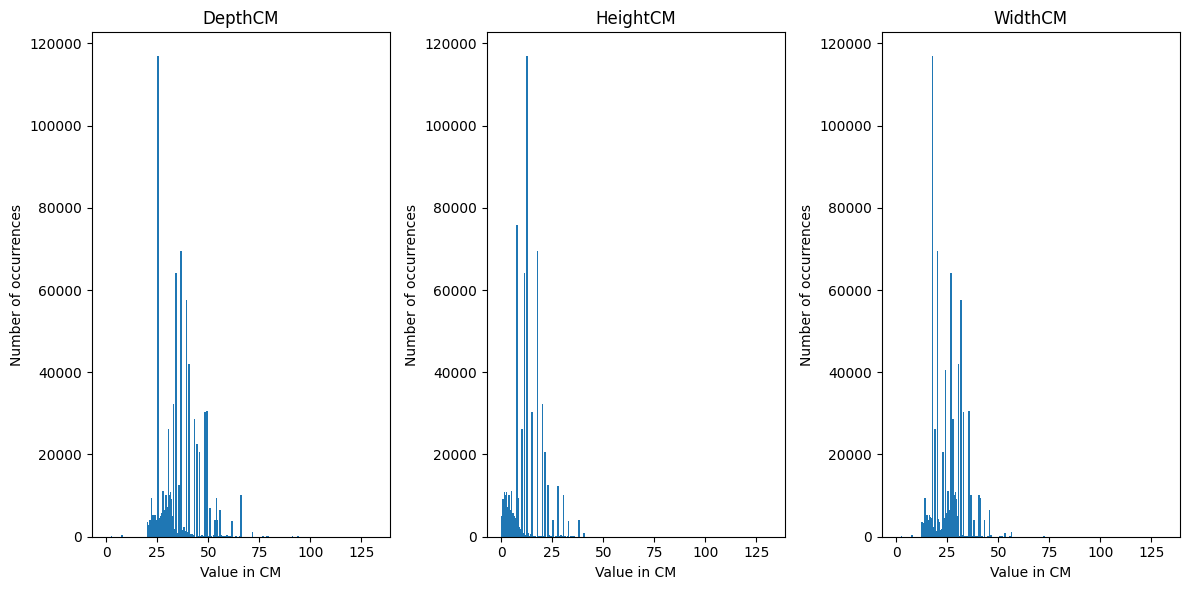

In [35]:
# Group the values in the columns and count the number of occurrences
grouped = df_package.groupby(['DepthCM', 'HeightCM', 'WidthCM']).size().reset_index(name='Count')

# Make the graph
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True)  

# DepthCM
axes[0].bar(grouped['DepthCM'], grouped['Count'])
axes[0].set_xlabel('Value in CM')
axes[0].set_ylabel('Number of occurrences')
axes[0].set_title('DepthCM')

# HeightCM
axes[1].bar(grouped['HeightCM'], grouped['Count'])
axes[1].set_xlabel('Value in CM')
axes[1].set_ylabel('Number of occurrences')
axes[1].set_title('HeightCM')

# WidthCM
axes[2].bar(grouped['WidthCM'], grouped['Count'])
axes[2].set_xlabel('Value in CM')
axes[2].set_ylabel('Number of occurrences')
axes[2].set_title('WidthCM')

# Show graph
plt.tight_layout()
plt.show()

For each parcel delivery service, the dimensions of parcels may vary. However, there is a common pattern: the depth is often the largest, the height is usually the smallest and the width falls somewhere in between. 

In the graphs above, the depth, height, and width are depicted with their respective frequencies. From this, it's evident that there are certain dimensions that occur frequently. Furthermore, a general trend is observable: the depth is the largest (thus, most dispersed towards the right), the height is notably the smallest, and the width falls in between. 

As a result, we can conclude that within our dataset, we are dealing with parcels. Therefore, for the purposes of this study, we will assume that the objects are cubic in shape.

Nog schrijven

c:\Users\Merel\anaconda3\envs\TIL6022\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



<AxesSubplot:>

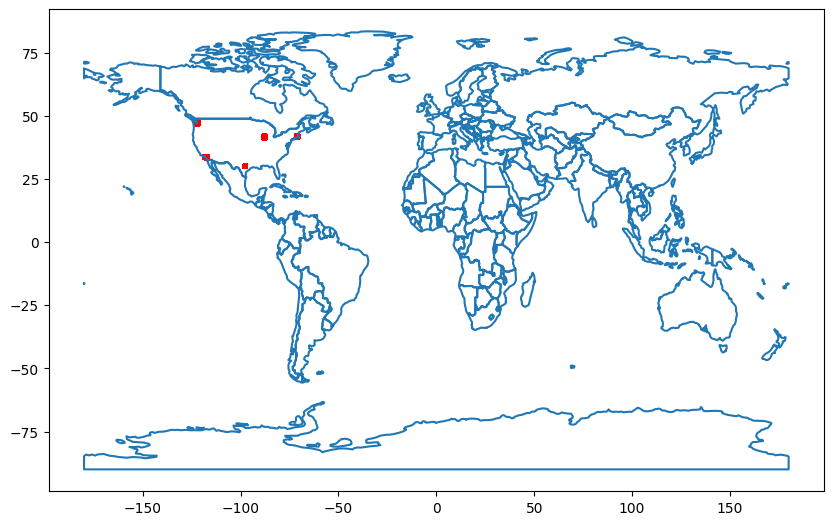

In [36]:
gdf = gpd.GeoDataFrame(df_route, geometry=gpd.points_from_xy(df_route['lng'], df_route['lat']), crs="EPSG:4326")

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)


As shown by the data distribution, each city has one or more station codes from which routes depart. In order to distribute packages over delivery vans in a meaningful way, the packages and vans must be located in the same city and station code. Therefore, for each station in a city, separate dataframes are created for the route and package data.

In [37]:
# Dictionary mapping station codes to cities
city_mapping = {
    'DLA': 'LosAngeles',
    'DSE': 'Seattle',
    'DCH': 'Chicago',
    'DBO': 'Boston',
    'DAU': 'Austin',
}

# Create dataframes for each city and station and store it in the dictionary
city_station_dataframes = {}

# Iterate through station codes and create DataFrames for each city
for station_code in df_route['station_code'].unique():
    city = city_mapping.get(station_code[:3], 'Unknown')
    station_df = df_route[df_route['station_code'] == station_code]
    
    # Check if the city is already a key in the dictionary
    if city in city_station_dataframes:
        city_station_dataframes[city][station_code] = station_df
    else:
        city_station_dataframes[city] = {station_code: station_df}


### 4.3 Creating Route and Package Dataframes for Stations in Cities

Tekst schrijven

In [38]:
# Create a single figure to store the map
fig = make_subplots(rows=1, cols=1)

# Create an initial layout without update menus
layout = go.Layout()

# Create an update menu that includes the buttons
layout = dict(
    updatemenus=[
        dict(
            type="buttons",
            showactive=True,
            buttons=[
                {'label': city,
                 'method': 'relayout',
                 'args': [{'mapbox.center': {"lat": city_lat, "lon": city_lon}, 'mapbox.zoom': 8},
                          {'annotations': []}]  # Clear annotations for the specific city
                }
                for city, (city_lat, city_lon) in [('Los Angeles', (34.0522, -118.2437)), ('Seattle', (47.6062, -122.3321)),
                                                 ('Chicago', (41.8781, -87.6298)), ('Boston', (42.3601, -71.0589)),
                                                 ('Austin', (30.2672, -97.7431))]
            ],
        )
    ]
)

# Iterate through cities in city_mapping
for city, city_name in city_mapping.items():
    city_df = df_route[df_route['station_code'].str.startswith(city)]

    for station_code in city_df['station_code'].unique():
        station_df = city_df[city_df['station_code'] == station_code]
        station_df = station_df.head(10)  # Limit to the first 10 dots per station

        fig.add_trace(go.Scattermapbox(
            lat=station_df['lat'],
            lon=station_df['lng'],
            mode='markers',
            marker=dict(size=5),
            name=f'Station: {station_code}',
        ))

        # Add annotations for the station code of the current city
        if city in city_name:
            for index, row in station_df.iterrows():
                fig.add_annotation(go.layout.Annotation(
                    x=row['lng'],
                    y=row['lat'],
                    text=row['station_code'],
                    showarrow=False,
                ))

# Set the map layout for the initial city
fig.update_mapboxes(
    center=dict(lat=34.0522, lon=-118.2437),  # Set the initial center (Los Angeles)
    style="carto-positron",
    zoom=8,  # Zoom out to include all data points per city
)

fig.update_layout(
    title=f'Routestops per city per station',  # Set the initial title (Los Angeles)
    updatemenus=layout['updatemenus'],  # Add the update menu
)

# Show the figure
fig.show()

To see how the dataframes can be used in the heuristics section, an example will be given in this section. For this example the data of Austin is used, as this city has only one station. In the code snippet below, both a dataframe for the packages in Austin as well as a dataframe for the vehicles in Austin is created. In the heuristics section, these dataframes will again be used to illustrate the mechanism behind the heuristics. Eventually, both a package and route dataframe be calculated for each station. To reduce the complexity of this problem, it is assumed that each unique route ID corresponds to a unique vehicle in the dataframe for the vehicles. This means that each vehicle is only used for one route. For instance, a vehicle is not used for both a morning and afternoon route.

In [39]:
# Get the Austin dataframe for station DAU1 from the dictionary containing all dataframes
austin_routes = city_station_dataframes['Austin']['DAU1']

# Identify unique route IDs from austin_routes dictionary and safe in a dictionary
austin_route_ids = austin_routes['RouteID'].unique()

# Create a dataframe for Austin packages and a dataframe for Austin vehicles by filtering based on route IDs
austin_packages_df = df_package[df_package['RouteID'].isin(austin_route_ids)]
austin_route_df = df_route[df_route['RouteID'].isin(austin_route_ids)]

In [40]:
display(austin_packages_df)
display(austin_route_df)

,PackageID,ScanStatus,StartTimeUTC,EndTimeUTC,PlannedServiceTimeSeconds,DepthCM,HeightCM,WidthCM,StopID,RouteID,package_volume
4231,PackageID_c89f3c60-e83a-46a0-9a5c-cae61ce25889,DELIVERED,NaN,NaN,63.00,33.50,2.00,20.80,AA,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,1393.60
4232,PackageID_d83df063-02f3-47e8-a34a-f490e244a971,DELIVERED,NaN,NaN,103.50,39.40,7.60,31.80,AD,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,9522.19
4233,PackageID_a979181d-f8c2-4d44-8976-50906a964877,DELIVERED,NaN,NaN,103.50,30.00,5.60,17.30,AD,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,2906.40
4234,PackageID_51bcf603-1334-48d0-ba7a-0c28df6ebda2,DELIVERED,NaN,NaN,95.50,49.50,7.60,35.60,AQ,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,13392.72
4235,PackageID_91514e2b-af1a-4abc-8fd7-ccbda44f5362,DELIVERED,NaN,NaN,95.50,30.50,10.20,19.10,AQ,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,5942.01
...,...,...,...,...,...,...,...,...,...,...,...
1456261,PackageID_267f659b-03af-4894-83c8-beee739a01be,DELIVERED,NaN,NaN,104.70,39.40,7.60,31.80,ZJ,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,9522.19
1456262,PackageID_48a5c8ac-7c3b-495d-847d-ab796affb919,DELIVERED,NaN,NaN,104.70,32.00,1.00,29.50,ZJ,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,944.00
1456263,PackageID_ea1ce1ed-bafe-411f-8589-89ba257632c6,DELIVERED,NaN,NaN,104.00,36.80,17.80,20.30,ZO,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,13297.31
1456264,PackageID_f078b1cf-4270-4f03-b16b-cf1880bcdcb3,DELIVERED,NaN,NaN,371.00,45.70,21.60,22.90,ZU,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,22605.05


,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stop_id,lat,lng,type,zone_id,geometry
2569,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,DAU1,2018-08-14,14:15:05,4247527.00,Medium,AA,30.38,-97.96,Dropoff,A-8.2D,POINT (-97.96434 30.38430)
2570,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,DAU1,2018-08-14,14:15:05,4247527.00,Medium,AD,30.36,-97.99,Dropoff,A-8.3G,POINT (-97.98745 30.36157)
2571,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,DAU1,2018-08-14,14:15:05,4247527.00,Medium,AQ,30.38,-97.97,Dropoff,A-8.3C,POINT (-97.97455 30.38023)
2572,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,DAU1,2018-08-14,14:15:05,4247527.00,Medium,AZ,30.35,-97.99,Dropoff,A-8.2J,POINT (-97.98758 30.35024)
2573,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,DAU1,2018-08-14,14:15:05,4247527.00,Medium,BR,30.36,-97.98,Dropoff,A-8.3H,POINT (-97.98369 30.36095)
...,...,...,...,...,...,...,...,...,...,...,...,...
903934,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,DAU1,2018-07-24,13:47:59,4247527.00,Medium,ZI,30.29,-97.74,Dropoff,D-13.1E,POINT (-97.74121 30.29177)
903935,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,DAU1,2018-07-24,13:47:59,4247527.00,Medium,ZJ,30.30,-97.75,Dropoff,D-15.3A,POINT (-97.75441 30.29512)
903936,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,DAU1,2018-07-24,13:47:59,4247527.00,Medium,ZO,30.29,-97.75,Dropoff,D-14.2C,POINT (-97.75042 30.28561)
903937,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,DAU1,2018-07-24,13:47:59,4247527.00,Medium,ZU,30.29,-97.74,Dropoff,D-13.2H,POINT (-97.74367 30.29014)


# 5  Heuristics for Package Volume Distribution 

In this section four bin packing heuristics are executed using the volumes of the packages and delivery vehicles. To reduce the complexity of the problem, it is assumed that a package fits in a delivery van if the package volume fits the remaining unfilled part of the vehicle volume.

First, the next fit model is build as the basic model. Since this model is not developed to optimize the problem, three other models are developed based on this basic model, namely the next k fit, first fit and best fit. During the proces, the behaviour of each model is presented using visualizations which are then utilitzed to compare the models.

### 5.1 Vehicle Class

Before modelling the heuristics, a vehicle class must be constructed. This vehicle class will be used to instantiate vehicles with certain properties to which packages are assigned.

In [41]:
# Class defining a vehicle
class Vehicle:
    
    def __init__(self, capacity):
        self._capacity = capacity
        self._packages = []
        self._load = 0
        
    # Checks if the package fits the vehicle
    def fits(self, package):
        return self.space_left() >= package
    
    # Recalculates the space left in the vehicle
    def space_left(self):
        return self._capacity - self._load
    
    # If possible, add the package to the vehicle
    def add_package(self, package):
        if not self.fits(package):
            raise Exception('The package with a volume of %i does not fit. Package: ' % package)
        self._packages.append(package)
        self._load += package
    
    def remove_package(self, package):
        for i in self._packages:
            if i == package:
                self._packages.remove(i)
                break
    
    def get_load(self):
        return self._load
    
    def __repr__(self):
        return 'Vehicle %s (%i)' % (self._packages, self.space_left())
    
    def __str__(self):
        return 'Vehicle %s (%i)' % (self._packages, self.space_left())

### 5.2 Dummy Data
In order to test the different algorithms in the next section, some dummy data has been set up. As one can see in the code snippet below, three different vehicle volumes and seven different package volumes are defined. These dummy volumes will be utilized for explaining and testing the four heuristics.

In [42]:
vehicles_volumes = [100, 100, 100]
packages_volumes = [25, 25, 60, 50, 20, 10, 20]

### 5.3 Defining and Testing the Heuristics
Now the next fit model can be implemented as a function, which takes the packages and their volume as input. This model will open the first vehicle and check if the first package fits the vehicle. If it does, the model will iterate to the next package. If the package doesn't fit the vehicle, the vehicle is closed and a new vehicle is opened.

In [43]:
def next_fit(packages, volumes):   
    # Take the first vehicle
    use_vehicle = Vehicle(volumes[0])
    vehicles = [use_vehicle]
    i = 1

    for package in packages:   
        # Assign the package in the vehicle if the package fits
        if not use_vehicle.fits(package):
            use_vehicle = Vehicle(volumes[i])
            i += 1
            vehicles.append(use_vehicle)
        use_vehicle.add_package(package) 
        
    # return list of vehicles
    return vehicles

In [44]:
# Defining a method for printing the solution vertically
def print_solution(vehicles):
    space_left = 0
    for vehicle in vehicles:
        print(vehicle)
        if vehicle.space_left() != -1:
            space_left += vehicle.space_left()
    print('total space left:  %i' % space_left)

After defining the next fit model and a method for printing the solution, the next fit will now be executed for our dummy data.

In [45]:
vehicles = next_fit(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [25, 25] (50)
Vehicle [60] (40)
Vehicle [50, 20, 10, 20] (0)
total space left:  90


Now the next k fit model will be developed, which is similar to the next fit model except that the number of opened vehicles is added as input parameter k.

In [46]:
def next_k_fit(packages, volumes, k):   
    # List for used vehicles
    vehicles = []
    i = 0
    
    for package in packages:
        # Assign the package to the first vehicle it fits
        package_assigned = False
        for used_vehicle in vehicles[-k:]: 
            if used_vehicle.fits(package):
                used_vehicle.add_package(package)
                package_assigned = True
                break
                
        # Add new empty vehicle if needed
        if not package_assigned:
            used_vehicle = Vehicle(volumes[i])
            i += 1
            vehicles.append(used_vehicle)
            used_vehicle.add_package(package)

    
    # return list of vehicles
    return vehicles

In [47]:
vehicles = next_k_fit(packages_volumes, vehicles_volumes, len(vehicles_volumes))
print_solution(vehicles)

Vehicle [25, 25, 50] (0)
Vehicle [60, 20, 10] (10)
Vehicle [20] (80)
total space left:  90


Next, the first fit model is implemented, which places the package in the first vehicle if it fits. This requires all vehicles to already be opened. In case the item doesn't fit, the package will be stored in a new vehicle.

In [48]:
# First Fit model
def first_fit(packages, volumes):
    # List for used vehicles
    vehicles = []
    i = 0

    # Assign the package to the first vehicle that fits it. If it doesn't fit, add new empty vehicle.
    for package in packages:
        for used_vehicle in vehicles:
            if used_vehicle.fits(package):
                used_vehicle.add_package(package)
                break
        else: 
            used_vehicle = Vehicle(volumes[i])
            vehicles.append(used_vehicle)
            used_vehicle.add_package(package)
            i += 1

    # Return list of vehicles
    return vehicles

In [49]:
# Test First Fit model
vehicles = first_fit(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [25, 25, 50] (0)
Vehicle [60, 20, 10] (10)
Vehicle [20] (80)
total space left:  90


Lastly, the best fit model is developed which places the package in the fullest vehicle by keeping track of the best vehicle to place the package in. Again, for this heuristic it is required that all vehicles are already open. If the package doesn't fit in the current best vehicle, a new vehicle is set as best vehicle to which the package gets allocated.

In [50]:
# Best Fit model
def best_fit(packages, volumes):
    # List for used vehicles
    vehicles = []
    i = 0

    # Loop through the packages and assign the package to the vehicle that is the fullest ('best')
    for package in packages:
        best_vehicle = None
        for used_vehicle in vehicles:
            if used_vehicle.fits(package) and (not best_vehicle or used_vehicle.space_left() < best_vehicle.space_left()):
                best_vehicle = used_vehicle
        
        # Add a new empty vehicle if package doesn't fit
        if best_vehicle == None:
            used_vehicle = Vehicle(volumes[i])
            vehicles.append(used_vehicle)
            used_vehicle.add_package(package)
            i += 1

        # Or add package to best vehicle
        else:
            best_vehicle.add_package(package)

    return vehicles

In [51]:
# Test Best Fit model
vehicles = best_fit(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [25, 25, 50] (0)
Vehicle [60, 20, 10] (10)
Vehicle [20] (80)
total space left:  90


### 5.4 Applying Heuristics on Data
Now that the heuristics are defined and tested with dummy data, the heuristics are applied to our package and route data in this section. To demonstrate the mechanism of the heuristics on our data, the data of Austin is used for testing as Austin has only one station. 

In [52]:
# Add package and vehicle volumes to lists
package_volumes_list = austin_packages_df['package_volume'].tolist()
vehicle_volumes_list = austin_route_df['executor_capacity_cm3'].tolist()

# Run the best fit heuristic on the data
distribution_vehicles = best_fit(package_volumes_list, vehicle_volumes_list)
print_solution(distribution_vehicles)

Vehicle [1393.6000000000001, 9522.192000000001, 2906.4, 13392.72, 5942.01, 25924.632, 1118.088, 5741.924, 13392.72, 13297.312, 3820.655999999999, 215.385, 4003.7959999999994, 2063.664, 13392.72, 50424.768000000004, 2603.3280000000004, 15726.41, 5942.01, 15726.41, 4154.9039999999995, 13297.312, 1991.202, 1689.9740000000002, 922.624, 5741.924, 10440.233999999999, 22605.048000000003, 5957.819999999999, 4933.558, 1285.44, 5741.924, 5741.924, 5741.924, 6282.387999999999, 9522.192000000001, 19806.411999999997, 142822.68, 2127.375, 7895.940000000001, 13392.72, 3138.9599999999996, 6282.387999999999, 9160.127999999999, 3788.8199999999997, 142822.68, 2089.1639999999998, 83954.64, 9522.192000000001, 10299.408000000001, 944.0, 52487.10399999999, 3436.112, 297.16799999999995, 7895.940000000001, 8577.998000000001, 5741.924, 9160.127999999999, 1192.9500000000003, 10440.233999999999, 9392.5, 994.5599999999998, 5741.924, 15726.41, 5741.924, 5741.924, 1262.9759999999999, 4309.6320000000005, 35772.659999

Now that one of the heuristics is applied on one of the stations and it appears to be working, all heuristics will be applied on each station. The results are stored in a dataframe that can be used to display the data.

In [53]:
# Defining a method for returning the amount of space left
def return_solution(vehicles):
    space_left = 0
    for vehicle in vehicles:
        if vehicle.space_left() != -1:
            space_left += vehicle.space_left()
    return space_left

# Set parameter k for next k fit heuristic (number of open vehicles)
k = 1

# Initialize empty lists for each DataFrame column
heuristics = []
cities = []
station_codes = []
efficiencies = []

heuristics_names = ['next_fit', 'next_k_fit', 'first_fit', 'best_fit']

for city, stations in city_station_dataframes.items():
    current_city = city
    for station, df in stations.items():
        # Get the dataframe for the current city and station
        city_station_df = df

        # IDentify unique route IDs for the current city and station
        route_ids = city_station_df['RouteID'].unique()  

        # Filter the main package and route dataframes based on route IDs
        packages_df = df_package[df_package['RouteID'].isin(route_ids)]
        routes_df = df_route[df_route['RouteID'].isin(route_ids)]

        # Add package and vehicle volumes to lists
        package_volumes_list = packages_df['package_volume'].tolist()
        vehicle_volumes_list = routes_df['executor_capacity_cm3'].tolist()

        # Run the best fit heuristic on the data
        distribution_by_city_station_next_fit = next_fit(package_volumes_list, vehicle_volumes_list)
        distribution_by_city_station_next_k_fit = next_k_fit(package_volumes_list, vehicle_volumes_list, k)
        distribution_by_city_station_first_fit = first_fit(package_volumes_list, vehicle_volumes_list)
        distribution_by_city_station_best_fit = best_fit(package_volumes_list, vehicle_volumes_list)

        for h in heuristics_names:
            heuristics.append(h)
            cities.append(city)
            station_codes.append(station)
            if h == 'next_fit':
                efficiencies.append(return_solution(distribution_by_city_station_next_fit))
            elif h == 'next_k_fit':
                efficiencies.append(return_solution(distribution_by_city_station_next_k_fit))
            elif h == 'first_fit':
                efficiencies.append(return_solution(distribution_by_city_station_first_fit))
            else:
                efficiencies.append(return_solution(distribution_by_city_station_best_fit))

# Create a pandas DataFrame from the extracted data
df_solutions = pd.DataFrame({
    "Heuristic": heuristics,
    "City": cities,
    "Station": station_codes,
    "Total space left in cm3": efficiencies
})

# Display the resulting DataFrame
df_solutions.head(5)


,Heuristic,City,Station,Total space left in cm3
0,next_fit,LosAngeles,DLA3,2858452.17
1,next_k_fit,LosAngeles,DLA3,2858452.17
2,first_fit,LosAngeles,DLA3,2858452.17
3,best_fit,LosAngeles,DLA3,2858452.17
4,next_fit,LosAngeles,DLA9,9243434.49


Now that the dataframe is created, a graph with the results for each station wil be constructed for each city. As one can see, the best fit heuristic produces the best outcome.

In [54]:
# Get a list of unique cities
cities = df_solutions['City'].unique()

# Define colors for each heuristic
heuristic_colors = {
    'next_fit': 'blue',
    'next_k_fit': 'red',
    'first_fit': 'green',
    'best_fit': 'purple'
}

# Create a function to generate the interactive plots
def plot_city(city):
    city_data = df_solutions[df_solutions['City'] == city]

    stations = city_data['Station'].unique()

    fig = go.Figure()

    for station in stations:
        station_data = city_data[city_data['Station'] == station]
        
        bar_data = [station_data[station_data['Heuristic'] == heuristic]['Total space left in cm3'].values[0] for heuristic in heuristic_colors]
        
        fig.add_trace(
            go.Bar(
                x=list(heuristic_colors.keys()),
                y=bar_data,
                name=station
            )
        )

    fig.update_layout(
        barmode='group',
        title=f'Space Left in {city} for All Stations and Heuristics',
        xaxis_title='Heuristic',
        yaxis_title='Total Space Left (cm3)'
    )

    fig.show()

# Create a plot for each city
for city in cities:
    plot_city(city)

# 6 Heuristic for Minimizing Remaining Capacity

below a example with 3 vehicles with respectively 100, 90, and 80 volume. the packages are chosen in order and the algorithm finds a solution by assigning the first twp packages to the first vehicle, the second two to the second vehicle and the third two to the last vehicle leaving one package unassigned. In theory all packages should fit in the three vehicles. A new algorithm is made that can reasign packages while trying to find the best allocation for all packages to the available vehicles. It does this by minimizing the total space left.

- first soort on big packages
- 

### 6.1 Storage Class

In [55]:
# Class defining a storage space
class Storage:
    
    def __init__(self):
        self._packages = []
        self._load = 0
        
    # If possible, add the package to the storage space
    def add_package(self, package):
        self._packages.append(package)
        self._load += package
    
    def remove_package(self, package):
        for i in self._packages:
            if i == package:
                self._packages.remove(i)
                break
    
    def space_left(self):
        return -1
    
    def get_load(self):
        return self._load
    
    def __repr__(self):
        return 'Storage %s ' % (self._packages)
    
    def __str__(self):
        return 'Storage %s ' % (self._packages)

### 6.2 Dummy Data for Testing

In [56]:
vehicles_volumes = [100, 90, 80]
packages_volumes = [40, 40, 30, 50, 30, 30, 50]

TODO:
Ik wil dat hij maar 1 vehicle of iets anders aan maakt met niet gealloceerde paketten. Daarnaast moet hij zien dat bij bijv veh 3 een plek van 40 over is en zoeken of er ergens een pakket can 40 is en die verplaatsen en zo schuiven tot alles goed vol zit. 

In [57]:
def allocation_packages(packages, volumes):

    # initialize boxes
    vehicles = []
    i = 0
    #not_assigned = []
    
    for package in packages:
        
        # Find the best vehicle
        best_vehicle = None
        for vehicle in vehicles:
            if vehicle.fits(package) and (not best_vehicle or vehicle.space_left() < best_vehicle.space_left()):
                best_vehicle = vehicle
        
        # Pick the next vehicle
        if best_vehicle == None:
            if i < len(volumes):
                vehicle = Vehicle(volumes[i])
                i += 1
                vehicle.add_package(package)
                vehicles.append(vehicle)
            else:
                not_assigned = Storage()
                not_assigned.add_package(package)
                '''no_vehicle_left = Vehicle(9999)
                no_vehicle_left.add_package(package)
                vehicles.append(vehicle)'''
                vehicles.append(not_assigned)
            
        # or add item to the best box
        else:
            best_vehicle.add_package(package)
        
        
    # return list of boxes
    return vehicles
    

In [58]:
vehicles_volumes = [100, 90, 80]

packages_volumes = [40, 40, 30, 50, 30, 30, 50]


vehicles = allocation_packages(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [40, 40] (20)
Vehicle [30, 50] (10)
Vehicle [30, 30] (20)
Storage [50] 
total space left:  50
